## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is a tool used for continuous variables that have numeric value. Classification is a tool for categorical data. Both are used to examine trends in data and extrapolate to predict unknown quantities or future trends.
2. A confusion table is a table used to measure a model's predictions versus the true values. It counts the false positives, false negatives, true positives, and true negatives that the model yields. This allows us to see how well a model is doing with the data it has been given. Depending on the context, like in healthcare for example, false negatives can be one of the most dangerous results, since it allows disease and infection to get by undetected and untreated. It's important to contextualize data when reading a model's performance to determine appropriate standards.
3. The SSE quantifies the model's accuracy. It measures how far away the actual data is from the trend determined by the model. It is the sum of the squared distance (y-axis) between a model and the true point.
4. Overfitting involves the machine learning the training data too well and becoming sensitive to the outliers and irrelavent points in the data. This results in inaccuracies due to an overly dependent model. It'll often attempt to capture all of the data points. Underfitting is a model that did not learn enough, it's often too simplistic for the data. It may have not captured the subtelties of the data; therefore, it's predictions are inaccurate as well. Small datasets and unrepresentative data often results in underfitted models.
5. Splitting the data into a training and testing set allows the machine to be trained on the data, and then verified. This is helpful since we already know the true values of the points. This allows us to definitely determine how well the machine is working. We would easily be able to create a confusion table and find the SSE. As a result, we can adjust the k-value accordingly and try again to see if we can reduce false positives and false negatives in the outcome. This method is a simple way of evaluating and adjusting a model to accurate predict data and work with utmost efficiency.
6.  A class label prediction involves one output as a prediction. The probability distribution over class labels outputs the likelihood of a point being each of the class categories. The class label prediction is simple, straightforward and efficient, but lacks details and flexibility. The probability distribution over class labels outputs the likelihood of a point being in each class. This reporting method requires further interpretation, for depending on context, confidence levels of classification have different thresholds (for example patients having/not having a disease).

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [6]:
#Loading the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
#Reading in the animal csv data, which was labeled as zoo.csv
zoo= pd.read_csv("https://raw.githubusercontent.com/gatesz33/knn/refs/heads/main/data/zoo.csv")
zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
len(zoo) #Checking the number of observations in the data frame

101

In [9]:
zoo['class'].value_counts() #Seeing how many animals of each class there are (checking the distribution)

class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [10]:
zoo.groupby('class')['animal'].apply(list) #Viewing what animals are in each class to get a better sense of the categories (this will be helpful in interpreting the confusion matrix)

class
1    [aardvark, antelope, bear, boar, buffalo, calf...
2    [chicken, crow, dove, duck, flamingo, gull, ha...
3    [pitviper, seasnake, slowworm, tortoise, tuatara]
4    [bass, carp, catfish, chub, dogfish, haddock, ...
5                             [frog, frog, newt, toad]
6    [flea, gnat, honeybee, housefly, ladybird, mot...
7    [clam, crab, crayfish, lobster, octopus, scorp...
Name: animal, dtype: object

In [11]:
var_zoo= zoo.drop(columns=['animal','class']) #Creating a subset with the columns I am not interested in dropped
print(var_zoo.var()) #Printing the variance across all of the characteristics

hair        0.246931
feathers    0.160396
eggs        0.245347
milk        0.243564
airborne    0.182970
aquatic     0.231683
predator    0.249505
toothed     0.241584
backbone    0.147921
breathes    0.166337
venomous    0.073663
fins        0.141386
legs        4.134653
tail        0.193069
domestic    0.113267
catsize     0.248317
dtype: float64


High variance means that these features vary significantly amongst different species of animal; therefore, these features are really helpful in distinguishing species. 
Low variance means that the features are common across different species of animals; therefore, these features are less helpful in distinguishing specific species.
The number of legs the animal has is one of the most telling variables in predicting its class, meanwhile whether the animal is venomous or not is one of the least telling variables since there is low variance across the classes.

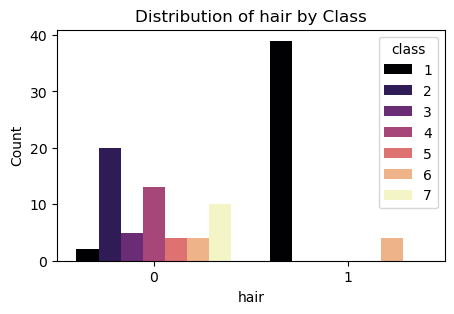

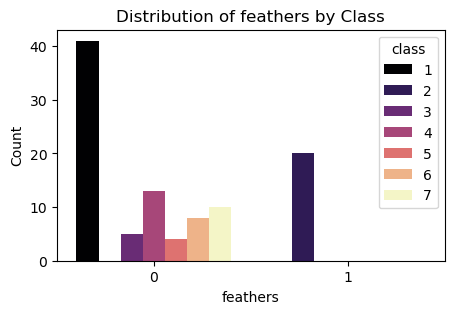

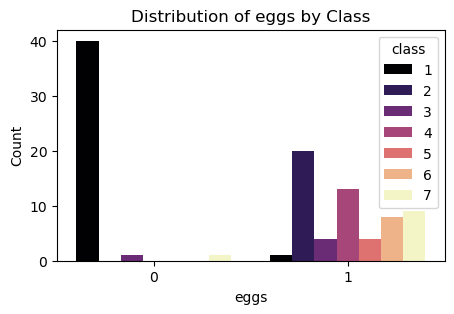

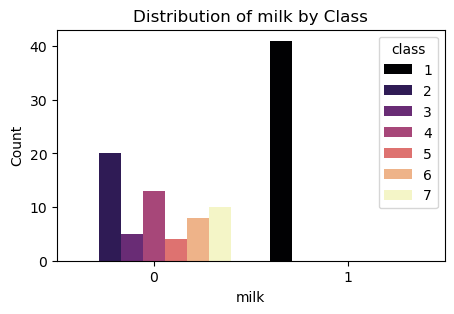

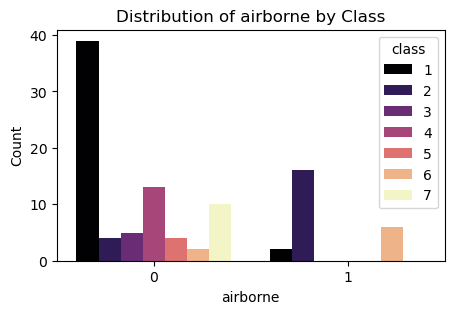

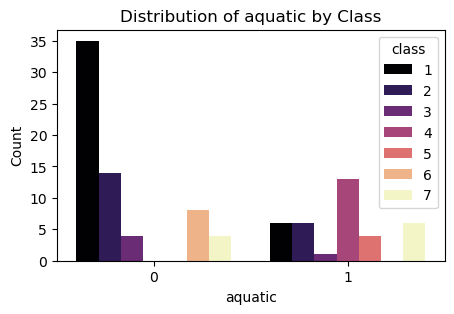

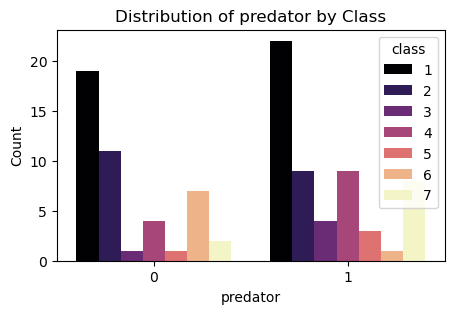

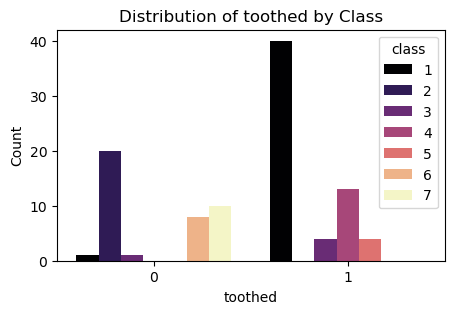

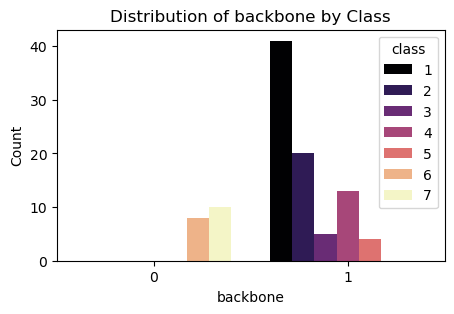

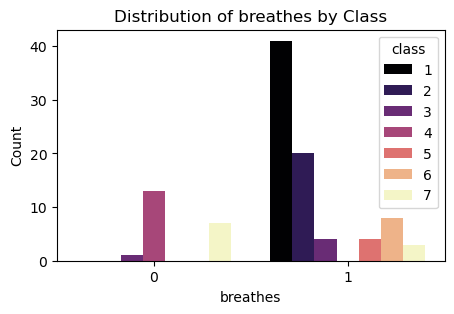

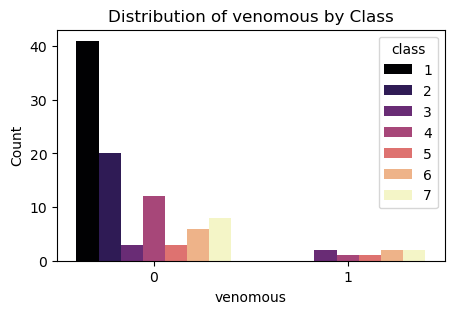

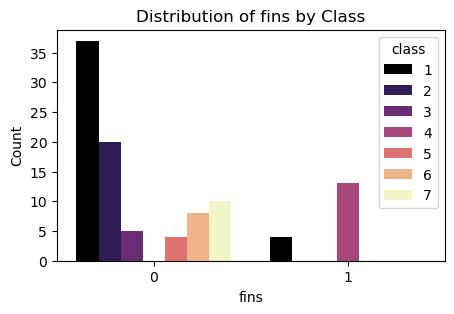

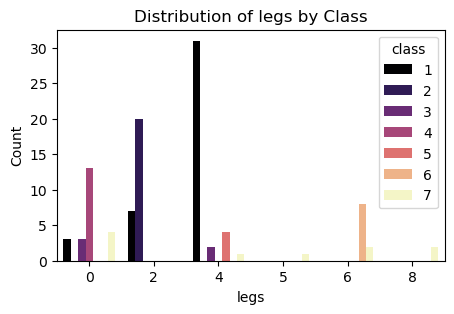

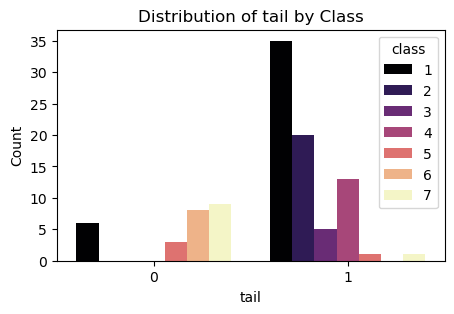

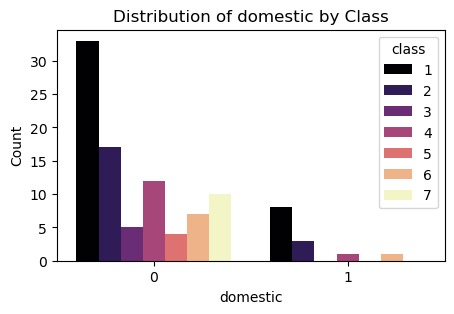

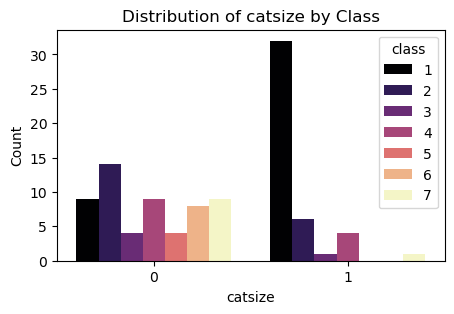

In [13]:
boolean_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize'] #Selecting columns with just boolean values in order to visualize distributions across these variables
zoo[boolean_columns] = zoo[boolean_columns].astype(int) #casting them to integers to create bar plots

# Create bar plots for each boolean feature by class
for column in boolean_columns:
    plt.figure(figsize=(5,3))
    sns.countplot(data=zoo, x=column, hue='class', palette="magma")
    plt.title(f'Distribution of {column} by Class')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [14]:
#importing specific tools from SciKit in order to train a Knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = zoo.drop(columns=['animal','class']) #Selecting just the boolean variables, the features that will help predict the target variable "class"
y = zoo['class'] #Define target variable that we are classifying

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, stratify=y, random_state=65) #Define the train test split, spliting down the middle and picking a specific value for random_state that ensures replicability of our results

In [15]:
model = KNeighborsClassifier(n_neighbors=1)  # Tuning k, defining the model
class_model= model.fit(X_train, y_train) #Training the model with training data
y_pred = model.predict(X_test) #Predicting using the trained model

In [16]:
accuracy = accuracy_score(y_test, y_pred) #Defining the accuracy score for prediction (we can define since we know the true y values of the data)
print(f"Classifier Accuracy: {accuracy:.2f}") #Printing the accuracy to the nearest hundreth

Classifier Accuracy: 0.94


##### Selecting Optimal 

In [18]:
N_train = len(y_train)
N_test = len(y_test)
k_bar = 50 # Number of k's we will loop over and try
Acc = [] #Accuracy

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a model for all values k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc.append( np.sum( y_hat == y_test )/N_test ) # Accuracy on testing data, this takes the number of predicted values that equals the true values (essentially the number correct) and divides by the number tested

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 #K cannot be 0
print(k_star) #Returning our optimal k-value

[1]


In [19]:
## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

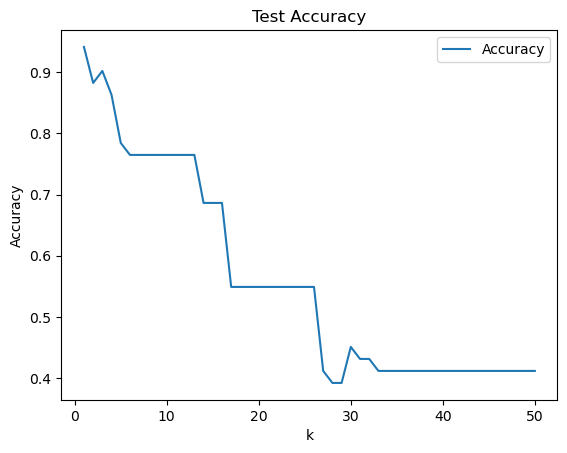

In [20]:
## Creating an accuracy plot across all different values of k
plt.plot(np.arange(1,k_bar+1),Acc,label='Accuracy') #Defining the plot and looping across all of the different k_bar values we are testing
plt.xlabel("k") #X axis label
plt.ylabel("Accuracy") #Y acis label
plt.legend(loc='upper right') #Legend placement
plt.title('Test Accuracy') #Title
plt.show() 

In [21]:
#Confusion Matrix
pd.crosstab(y_test,y_hat)

col_0,1,2,3,4,5,6,7
class,,,,,,,
1,18,0,0,3,0,0,0
2,0,10,0,0,0,0,0
3,0,0,2,0,0,0,0
4,0,0,0,7,0,0,0
5,0,0,0,0,2,0,0
6,0,0,0,0,0,4,0
7,0,0,0,0,0,0,5


This is a confusion matrix for the model I trained with the k value I chose. We can see that that it has mostly correct predictions, for the values are predicted nearly to the true values for everything except class 4. We can see that three of the class 4 inputs have been predicted as class 1.

In [23]:
#Determining which features led to confusion between the classes, comparing the medians of each feature to view similarities
confus_class= zoo[zoo['class'].isin([1, 4])] #Subsetting classes 1 and 4
confus_class= confus_class.drop(columns='animal') #Dropping the variable with "object" type data in the variable
class_comparison = confus_class.groupby('class').median() #Grouping by class to compare the two medians
print(class_comparison)

       hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
class                                                                     
1       1.0       0.0   0.0   1.0       0.0      0.0       1.0      1.0   
4       0.0       0.0   1.0   0.0       0.0      1.0       1.0      1.0   

       backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
class                                                                     
1           1.0       1.0       0.0   0.0   4.0   1.0       0.0      1.0  
4           1.0       0.0       0.0   1.0   0.0   1.0       0.0      0.0  


At first glance, ardvarks, cows, antelope and fish do not have much in common. After comparing the presence and absence of the features considered by the model, we can see that a variety of similarities could have caused the misclassification. Both classes of animals do not have features, are not airborne, are not venomous, and are not domestic. Both classes of animals (for the most part) are predators, toothed, have backbones, and have tails. Because 8/16 variables are generally similar, any inputs that deviated away from the median will create more than a 50% similarty. Using our k-value of 1 could easily misclassify a species in such a case! This is the weakness of using such a low k-value.

### Specific Feature Classification ###

In [26]:
X = zoo[['milk','aquatic','airborne']] #Subseting the three classifying features we are interested in 
y = zoo['class'] #Define target variable that we are classifying

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, stratify=y, random_state=65) #Spliting the data halfway just like we did previously

In [47]:
model = KNeighborsClassifier(n_neighbors=6)  #Defining the model
class_model= model.fit(X_train, y_train) #Training the model on the randomly selected train data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) #Predicting accuracy of the model
print(f"Classifier Accuracy: {accuracy:.2f}") #Printing accuracy to the nearest hundreth


Classifier Accuracy: 0.75


In [49]:
N_train = len(y_train)
N_test = len(y_test)
k_bar = 50 # Number of k's we will loop over and try
Acc = [] #Accuracy

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a model for all values k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc.append( np.sum( y_hat == y_test )/N_test ) # Accuracy on testing data, this takes the number of predicted values that equals the true values (essentially the number correct) and divides by the number tested

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 #K cannot be 0
print(k_star) #Returning our optimal k-values

[6 7 8 9]


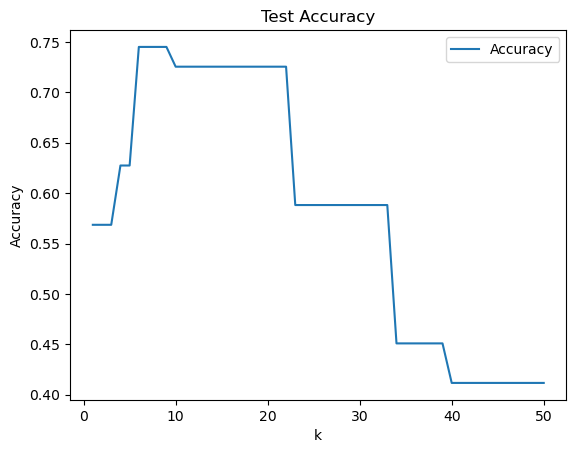

In [51]:
plt.plot(np.arange(1,k_bar+1),Acc,label='Accuracy') #Creating a k-value accuracy table
plt.xlabel("k") #Labeling x axis with k
plt.ylabel("Accuracy") #Labeling y axis with accuracy
plt.legend(loc='upper right') #Placing legend correctly
plt.title('Test Accuracy') #Adding title
plt.show()

In [55]:
pd.crosstab(y_test,y_pred) #Printing a confusion matrix to see what the model predicted

col_0,1,2,4
class,,,
1,21,0,0
2,0,10,0
3,0,2,0
4,0,0,7
5,0,0,2
6,0,4,0
7,0,2,3


In [61]:
model.predict_proba(X_test.values) #Printing a probability distribution over class labels (depends largely on selected k-value)

array([[0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12, 0.04, 0.08, 0.1 ],
       [0.4 , 0.2 , 0.06, 0.12,

We can see that the model only predicted classes 1,2, and 4. This is most definitely an instance of class bias, and this is affirmed by the probability distributions by class. These classes are the largest in our sample, and as a result the model is more likely to predict that the inputs belong to these outputs. We can see that there is a 72% chance an output is either class 1,2, or 4. This can oftentimes be solved by weighting the classes, so that the sample size doesn't impact the training of the model. Additionally, this is partly the result of an underfitted model. I suspect that the three features here were not specific enough to distinguish between the other classes and created an oversimplified model.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.